<a href="https://colab.research.google.com/github/yuvalBerghaus/computer_vision/blob/main/task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

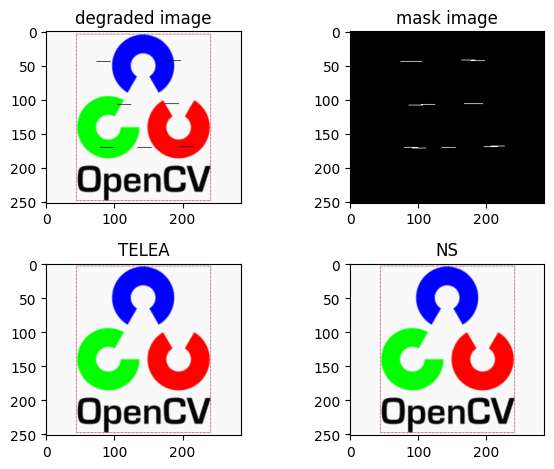

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
img = cv2.imread('OpenCV_Logo_B.png') # input
mask = cv2.imread('OpenCV_Logo_C.png',0) # mask
dst_TELEA = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
dst_NS = cv2.inpaint(img,mask,3,cv2.INPAINT_NS)
plt.subplot(221), plt.imshow(img)
plt.title('degraded image')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.title('mask image')
plt.subplot(223), plt.imshow(dst_TELEA)
plt.title('TELEA')
plt.subplot(224), plt.imshow(dst_NS)
plt.title('NS')
plt.tight_layout()
plt.show()

#The first result

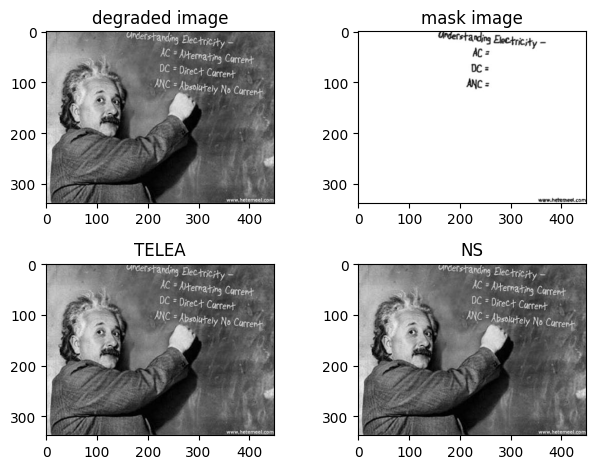

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
img = cv2.imread('emc2.jpg') # input
mask = cv2.imread('emc2cover2.jpg',0) # mask
dst_TELEA = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
dst_NS = cv2.inpaint(img,mask,3,cv2.INPAINT_NS)
plt.subplot(221), plt.imshow(img)
plt.title('degraded image')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.title('mask image')
plt.subplot(223), plt.imshow(dst_TELEA)
plt.title('TELEA')
plt.subplot(224), plt.imshow(dst_NS)
plt.title('NS')
plt.tight_layout()
plt.show()

#The second result

<ipython-input-4-448a32d7518e>:30: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image_result = inpaint.inpaint_biharmonic(image_defect, mask, multichannel=True)


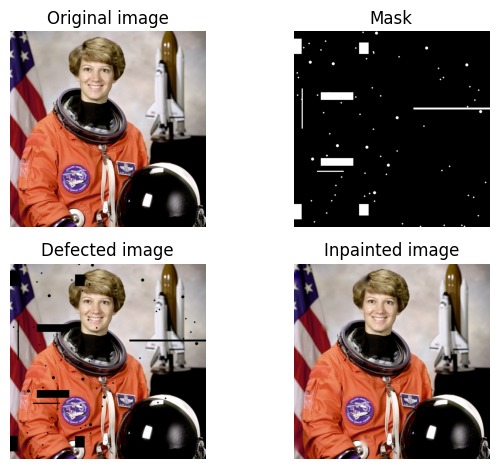

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.morphology import disk, binary_dilation
from skimage.restoration import inpaint
image_orig = data.astronaut()
# Create mask with six block defect regions
mask = np.zeros(image_orig.shape[:-1], dtype=bool)
mask[20:60, 0:20] = 1
mask[160:180, 70:155] = 1
mask[30:60, 170:195] = 1
mask[-60:-30, 170:195] = 1
mask[-180:-160, 70:155] = 1
mask[-60:-20, 0:20] = 1
# add a few long, narrow defects
mask[200:205, -200:] = 1
mask[150:255, 20:23] = 1
mask[365:368, 60:130] = 1
# add randomly positioned small point-like defects
rstate = np.random.RandomState(0)
for radius in [0, 2, 4]:
 # larger defects are less common
 thresh = 3 + 0.25 * radius # make larger defects less commmon
 tmp_mask = rstate.randn(*image_orig.shape[:-1]) > thresh
 if radius > 0:
    tmp_mask = binary_dilation(tmp_mask, disk(radius,dtype=bool))
    mask[tmp_mask] = 1
    # Apply defect mask to the image over the same region in each color channel
    image_defect = image_orig * ~mask[..., np.newaxis]
    image_result = inpaint.inpaint_biharmonic(image_defect, mask, multichannel=True)
fig, axes = plt.subplots(ncols=2, nrows=2)
ax = axes.ravel()
ax[0].set_title('Original image')
ax[0].imshow(image_orig)
ax[1].set_title('Mask')
ax[1].imshow(mask, cmap=plt.cm.gray)
ax[2].set_title('Defected image')
ax[2].imshow(image_defect)
ax[3].set_title('Inpainted image')
ax[3].imshow(image_result)
for a in ax:
 a.axis('off')
fig.tight_layout()
plt.show()

# The difference between the 2 code sections is that the first uses the Navier-Stokes and Alexandru Telea algorithms, and the second uses the biharmonic equation algorithm.